<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/t_SNE_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# t-SNE (T-distributed Stochastic Neighbor Embedding (t-SNE) is a non linear dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space mainly in 2D or 3D. It focus on preserving the local structure and pattern of the data.)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/mnist_test(ML - t-SNE dataset).csv")
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


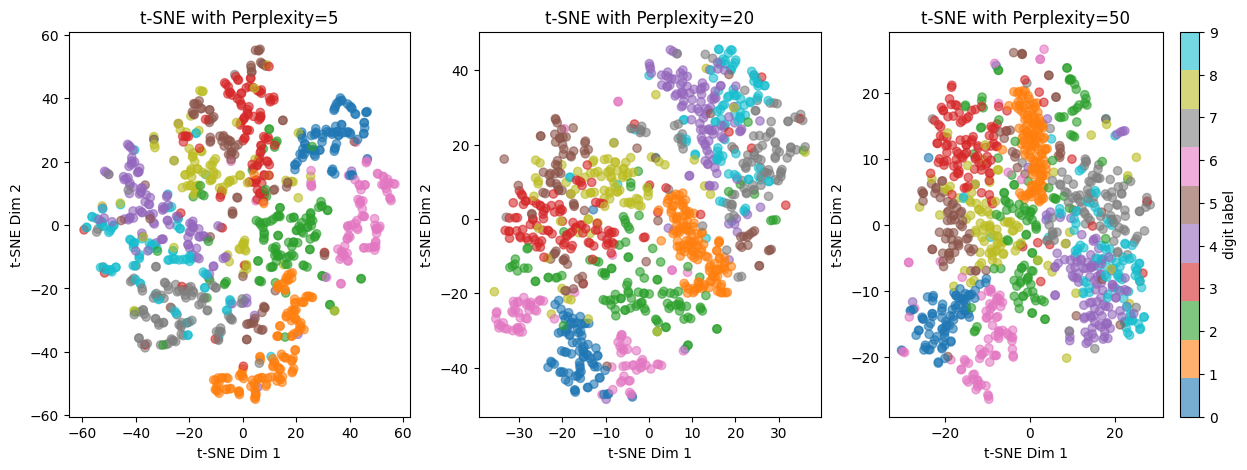

In [ ]:
y = df["label"]
x = df.drop("label", axis = 1)
df.shape

# Perplexity = number of effective neighbors considered for each point.
x_scaled = StandardScaler().fit_transform(x)
perplexities = [5, 20, 50]
plt.figure(figsize = (15, 5))

# enumerate() gives both the index and the value when looping
# 1 means start counting from 1 instead of the default 0.
# learning_rate: Controls step size in gradient descent (how far points move at each update).
for i, perp in enumerate(perplexities, 1):
  tsne = TSNE(
      n_components = 2, perplexity = perp,
      learning_rate = 200, n_iter = 500, random_state = 42)
  x_tsne = tsne.fit_transform(x_scaled[:1000]) # use only first 1000 rows

# c = y[:1000]: Color each point by its true label(1000 labels)
# cmap = "tab10": Colormap with 10 distinct colors
# alpha: Used for transparancy
# plt.gca() = Get Current Axes, it returns the Axes object (the area where data is plotted).
# ax = It is just a variable name storing that axes object( we use ax in place of plt for better visualization)
  plt.subplot(1, 3, i)
  scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c = y[:1000], cmap = "tab10", alpha = 0.6)
  plt.title(f"t-SNE with Perplexity={perp}")
  plt.xlabel("t-SNE Dim 1")
  plt.ylabel("t-SNE Dim 2")
plt.colorbar(scatter, ax = plt.gca(), label = "digit label")
plt.show()